In [1]:
from legal_eval.data import download_data, get_hf_dataset, parse_to_ner, cast_ner_labels_to_int
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

DATA_PATH = Path("../data")

%load_ext autoreload
%autoreload 2

download_data(DATA_PATH)
dataset = get_hf_dataset(DATA_PATH)
dataset_ner = parse_to_ner(dataset)
dataset_casted = cast_ner_labels_to_int(dataset_ner)


Found cached dataset json (D:/hf_datasets/json/default-9acc4922681c4d90/0.0.0/fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e)


  0%|          | 0/1 [00:00<?, ?it/s]

Found cached dataset json (D:/hf_datasets/json/default-8e94a40253265d68/0.0.0/fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached processed dataset at D:\hf_datasets\json\default-9acc4922681c4d90\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-145ac9fa7a6304a8.arrow
Loading cached processed dataset at D:\hf_datasets\json\default-8e94a40253265d68\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-ce9751ed476fc978.arrow
Loading cached processed dataset at D:\hf_datasets\json\default-9acc4922681c4d90\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-8e2deb16e36998fe.arrow
Loading cached processed dataset at D:\hf_datasets\json\default-8e94a40253265d68\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-c3d9bf958cdab6ce.arrow


Casting the dataset:   0%|          | 0/10995 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/1074 [00:00<?, ? examples/s]

Lets see imbalances first

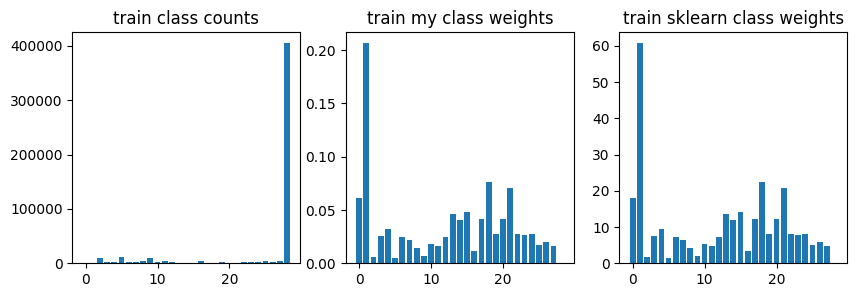

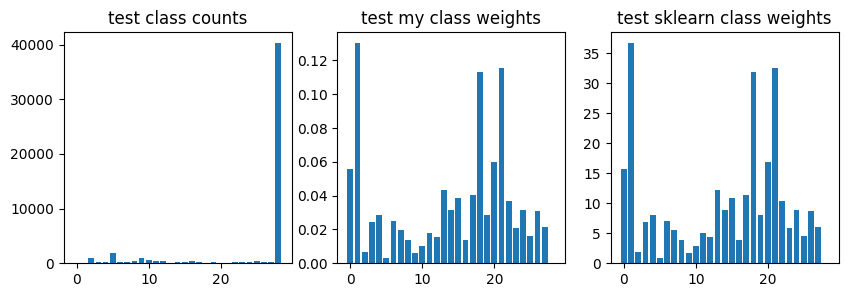

In [2]:
from legal_eval.utils import get_class_counts
from itertools import chain
from sklearn.utils.class_weight import compute_class_weight


for set_ in ["train", "test"]:
    class_counts = get_class_counts(dataset_casted[set_])
    flattened_y = np.array(list(chain(*dataset_casted[set_]['ner_tags'])))
    fig, ax = plt.subplots(1,3, figsize=(10, 3))
    ax[0].bar(np.arange(29), class_counts)
    ax[0].set_title(f"{set_} class counts")

    inverted_count = class_counts ** (-1)
    my_weights = inverted_count / inverted_count.sum()
    ax[1].bar(np.arange(29), my_weights)
    ax[1].set_title(f"{set_} my class weights")

    sklearn_weights = compute_class_weight("balanced", classes = np.unique(flattened_y), y=flattened_y)

    ax[2].bar(np.arange(29), sklearn_weights)
    ax[2].set_title(f"{set_} sklearn class weights")

In [3]:
from legal_eval.baselines import TurboSimpleBaseline
from legal_eval.utils import print_predictions, evaluate_nerlegal

In [4]:
baseline1 = TurboSimpleBaseline()
baseline1.fit(dataset_ner['train'])

In [5]:
evaluate_nerlegal(dataset_ner['test'], baseline1)

Loading cached processed dataset at D:\hf_datasets\json\default-8e94a40253265d68\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-4ec81a2a80d94162.arrow


,CASE_NUMBER,COURT,DATE,GPE,JUDGE,LAWYER,ORG,OTHER_PERSON,PETITIONER,PRECEDENT,...,RESPONDENT,STATUTE,WITNESS,overall_precision,overall_recall,overall_f1,overall_accuracy,total_time_in_seconds,samples_per_second,latency_in_seconds
precision,0.0,0.000483,0.005535,0.037037,0.093458,0.054054,0.003307,0.027755,0.0,0.0,...,0.004963,0.020853,0.007246,0.007369,0.057106,0.013053,0.441148,0.333982,3215.742166,0.000311
recall,0.0,0.003378,0.041860,0.019608,0.058824,0.023810,0.196203,0.129278,0.0,0.0,...,0.013029,0.215686,0.018519,0.007369,0.057106,0.013053,0.441148,0.333982,3215.742166,0.000311
f1,0.0,0.000845,0.009777,0.025641,0.072202,0.033058,0.006504,0.045699,0.0,0.0,...,0.007188,0.038029,0.010417,0.007369,0.057106,0.013053,0.441148,0.333982,3215.742166,0.000311
number,119.0,296.000000,215.000000,153.000000,170.000000,504.000000,158.000000,263.000000,206.0,177.0,...,307.000000,204.000000,54.000000,0.007369,0.057106,0.013053,0.441148,0.333982,3215.742166,0.000311


In [6]:
print_predictions(dataset_ner['test'][0], baseline1)

TOKEN	PREDICTION	TARGET
True,	O	O
our	O	O
Constitution	B-STATUTE	B-STATUTE
has	O	O
no	O	O
'due	O	O
process'	O	O
clause	B-PROVISION	O
or	I-PROVISION	O
the	I-ORG	O
VIII	I-PROVISION	O
Amendment;	O	O
but,	O	O
in	I-ORG	O
this	O	O
branch	O	O
of	I-ORG	O
law,	O	O
after	I-PROVISION	O
R.C.	B-JUDGE	B-PRECEDENT
Cooper	I-PETITIONER	I-PRECEDENT
v.	I-PRECEDENT	I-PRECEDENT
Union	B-ORG	I-PRECEDENT
of	I-ORG	I-PRECEDENT
India,	I-ORG	I-PRECEDENT
(1970)	I-PRECEDENT	I-PRECEDENT
1	B-DATE	I-PRECEDENT
SCC	I-PRECEDENT	I-PRECEDENT
248	I-PRECEDENT	I-PRECEDENT
and	I-ORG	O
Maneka	B-OTHER_PERSON	B-PRECEDENT
Gandhi	B-ORG	I-PRECEDENT
v.	I-PRECEDENT	I-PRECEDENT
Union	B-ORG	I-PRECEDENT
of	I-ORG	I-PRECEDENT
India,	I-ORG	I-PRECEDENT
(1978)	O	I-PRECEDENT
1	B-DATE	I-PRECEDENT
SCC	I-PRECEDENT	I-PRECEDENT
248,	O	I-PRECEDENT
the	I-ORG	O
consequence	O	O
is	O	O
the	I-ORG	O
same.	O	O


## ML baseline

In [28]:
from legal_eval.baselines import MLBaseline
import fasttext
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [8]:
MODEL_PATH = "../embeddings/legal_eval.bin"

embed_model = fasttext.load_model(MODEL_PATH)

def test_ml_baseline(embed_model, ml_model, window_size, kernel_type, print_preds = False):
    ml_baseline = MLBaseline(embed_model, ml_model, window_size=window_size, kernel_type=kernel_type)
    X, y = ml_baseline.prepare_dataset(dataset_casted['train'])
    ml_baseline.fit(X, y, n_o_selected=10000)
    
    if print_preds:
        print_predictions(dataset_ner['test'][0], ml_baseline)

    return evaluate_nerlegal(dataset_ner['test'], ml_baseline)

In [9]:
test_ml_baseline(embed_model, LogisticRegression(), window_size=5, kernel_type="gaussian")

Parameter 'fn_kwargs'={'embed_model': <fasttext.FastText._FastText object at 0x00000227EEDB2020>, 'window_size': 5, 'kernel_type': 'gaussian'} of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/10995 [00:00<?, ? examples/s]

c:\Users\sebas\mambaforge\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Loading cached processed dataset at D:\hf_datasets\json\default-8e94a40253265d68\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-4ec81a2a80d94162.arrow


,CASE_NUMBER,COURT,DATE,GPE,JUDGE,LAWYER,ORG,OTHER_PERSON,PETITIONER,PRECEDENT,...,RESPONDENT,STATUTE,WITNESS,overall_precision,overall_recall,overall_f1,overall_accuracy,total_time_in_seconds,samples_per_second,latency_in_seconds
precision,0.030726,0.092820,0.139776,0.124260,0.073431,0.033486,0.020000,0.047619,0.015116,0.009924,...,0.022614,0.085747,0.046875,0.059178,0.232641,0.094355,0.642538,1.273554,843.309088,0.001186
recall,0.184874,0.358108,0.813953,0.137255,0.323529,0.087302,0.031646,0.125475,0.063107,0.073446,...,0.133550,0.362745,0.055556,0.059178,0.232641,0.094355,0.642538,1.273554,843.309088,0.001186
f1,0.052695,0.147427,0.238582,0.130435,0.119695,0.048405,0.024510,0.069038,0.024390,0.017485,...,0.038679,0.138707,0.050847,0.059178,0.232641,0.094355,0.642538,1.273554,843.309088,0.001186
number,119.000000,296.000000,215.000000,153.000000,170.000000,504.000000,158.000000,263.000000,206.000000,177.000000,...,307.000000,204.000000,54.000000,0.059178,0.232641,0.094355,0.642538,1.273554,843.309088,0.001186


In [10]:
test_ml_baseline(embed_model, XGBClassifier(), window_size=5, kernel_type="gaussian")

Map:   0%|          | 0/10995 [00:00<?, ? examples/s]

Loading cached processed dataset at D:\hf_datasets\json\default-8e94a40253265d68\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-4ec81a2a80d94162.arrow


,CASE_NUMBER,COURT,DATE,GPE,JUDGE,LAWYER,ORG,OTHER_PERSON,PETITIONER,PRECEDENT,...,RESPONDENT,STATUTE,WITNESS,overall_precision,overall_recall,overall_f1,overall_accuracy,total_time_in_seconds,samples_per_second,latency_in_seconds
precision,0.055109,0.250685,0.310696,0.161954,0.124777,0.126110,0.039244,0.069745,0.031077,0.010293,...,0.026953,0.200704,0.016484,0.099551,0.36697,0.156616,0.71843,10.737876,100.019784,0.009998
recall,0.403361,0.618243,0.851163,0.411765,0.411765,0.281746,0.170886,0.269962,0.135922,0.073446,...,0.159609,0.558824,0.055556,0.099551,0.36697,0.156616,0.71843,10.737876,100.019784,0.009998
f1,0.096970,0.356725,0.455224,0.232472,0.191518,0.174233,0.063830,0.110851,0.050587,0.018056,...,0.046118,0.295337,0.025424,0.099551,0.36697,0.156616,0.71843,10.737876,100.019784,0.009998
number,119.000000,296.000000,215.000000,153.000000,170.000000,504.000000,158.000000,263.000000,206.000000,177.000000,...,307.000000,204.000000,54.000000,0.099551,0.36697,0.156616,0.71843,10.737876,100.019784,0.009998


In [11]:
test_ml_baseline(embed_model, XGBClassifier(), window_size=10, kernel_type="gaussian")

Map:   0%|          | 0/10995 [00:00<?, ? examples/s]

Loading cached processed dataset at D:\hf_datasets\json\default-8e94a40253265d68\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-4ec81a2a80d94162.arrow


,CASE_NUMBER,COURT,DATE,GPE,JUDGE,LAWYER,ORG,OTHER_PERSON,PETITIONER,PRECEDENT,...,RESPONDENT,STATUTE,WITNESS,overall_precision,overall_recall,overall_f1,overall_accuracy,total_time_in_seconds,samples_per_second,latency_in_seconds
precision,0.056832,0.244326,0.315609,0.145078,0.140845,0.131047,0.044355,0.072957,0.042952,0.011041,...,0.031450,0.220077,0.023121,0.102399,0.376703,0.161026,0.720293,10.905392,98.483396,0.010154
recall,0.394958,0.618243,0.855814,0.366013,0.411765,0.295635,0.208861,0.285171,0.189320,0.079096,...,0.192182,0.558824,0.074074,0.102399,0.376703,0.161026,0.720293,10.905392,98.483396,0.010154
f1,0.099366,0.350239,0.461153,0.207792,0.209895,0.181597,0.073171,0.116189,0.070018,0.019377,...,0.054054,0.315789,0.035242,0.102399,0.376703,0.161026,0.720293,10.905392,98.483396,0.010154
number,119.000000,296.000000,215.000000,153.000000,170.000000,504.000000,158.000000,263.000000,206.000000,177.000000,...,307.000000,204.000000,54.000000,0.102399,0.376703,0.161026,0.720293,10.905392,98.483396,0.010154


In [12]:
test_ml_baseline(embed_model, XGBClassifier(), window_size=5, kernel_type="uniform")

Map:   0%|          | 0/10995 [00:00<?, ? examples/s]

Loading cached processed dataset at D:\hf_datasets\json\default-8e94a40253265d68\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-4ec81a2a80d94162.arrow


,CASE_NUMBER,COURT,DATE,GPE,JUDGE,LAWYER,ORG,OTHER_PERSON,PETITIONER,PRECEDENT,...,RESPONDENT,STATUTE,WITNESS,overall_precision,overall_recall,overall_f1,overall_accuracy,total_time_in_seconds,samples_per_second,latency_in_seconds
precision,0.029056,0.098560,0.143411,0.069552,0.068452,0.066914,0.018428,0.037363,0.022263,0.016716,...,0.011716,0.069577,0.029762,0.050971,0.212849,0.082247,0.645143,10.167681,105.628803,0.009467
recall,0.201681,0.300676,0.688372,0.294118,0.270588,0.142857,0.094937,0.193916,0.116505,0.096045,...,0.065147,0.250000,0.092593,0.050971,0.212849,0.082247,0.645143,10.167681,105.628803,0.009467
f1,0.050794,0.148457,0.237370,0.112500,0.109264,0.091139,0.030864,0.062654,0.037383,0.028476,...,0.019861,0.108858,0.045045,0.050971,0.212849,0.082247,0.645143,10.167681,105.628803,0.009467
number,119.000000,296.000000,215.000000,153.000000,170.000000,504.000000,158.000000,263.000000,206.000000,177.000000,...,307.000000,204.000000,54.000000,0.050971,0.212849,0.082247,0.645143,10.167681,105.628803,0.009467


In [13]:
test_ml_baseline(embed_model, XGBClassifier(), window_size=10, kernel_type="uniform")

Map:   0%|          | 0/10995 [00:00<?, ? examples/s]

Loading cached processed dataset at D:\hf_datasets\json\default-8e94a40253265d68\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-4ec81a2a80d94162.arrow


,CASE_NUMBER,COURT,DATE,GPE,JUDGE,LAWYER,ORG,OTHER_PERSON,PETITIONER,PRECEDENT,...,RESPONDENT,STATUTE,WITNESS,overall_precision,overall_recall,overall_f1,overall_accuracy,total_time_in_seconds,samples_per_second,latency_in_seconds
precision,0.009724,0.038985,0.066620,0.048458,0.029167,0.034594,0.007884,0.028378,0.015274,0.021311,...,0.009063,0.051230,0.014354,0.029113,0.123621,0.047127,0.568249,10.489698,102.386174,0.009767
recall,0.050420,0.145270,0.441860,0.215686,0.123529,0.085317,0.037975,0.174905,0.082524,0.073446,...,0.039088,0.122549,0.055556,0.029113,0.123621,0.047127,0.568249,10.489698,102.386174,0.009767
f1,0.016304,0.061472,0.115783,0.079137,0.047191,0.049227,0.013058,0.048832,0.025777,0.033037,...,0.014715,0.072254,0.022814,0.029113,0.123621,0.047127,0.568249,10.489698,102.386174,0.009767
number,119.000000,296.000000,215.000000,153.000000,170.000000,504.000000,158.000000,263.000000,206.000000,177.000000,...,307.000000,204.000000,54.000000,0.029113,0.123621,0.047127,0.568249,10.489698,102.386174,0.009767


In [14]:
test_ml_baseline(embed_model, XGBClassifier(), window_size=1, kernel_type="uniform")

Map:   0%|          | 0/10995 [00:00<?, ? examples/s]

Loading cached processed dataset at D:\hf_datasets\json\default-8e94a40253265d68\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-4ec81a2a80d94162.arrow


,CASE_NUMBER,COURT,DATE,GPE,JUDGE,LAWYER,ORG,OTHER_PERSON,PETITIONER,PRECEDENT,...,RESPONDENT,STATUTE,WITNESS,overall_precision,overall_recall,overall_f1,overall_accuracy,total_time_in_seconds,samples_per_second,latency_in_seconds
precision,0.007861,0.084677,0.196005,0.175182,0.057143,0.082011,0.046332,0.046316,0.009054,0.000565,...,0.012707,0.118156,0.012987,0.044753,0.260545,0.076385,0.637169,9.839955,109.146835,0.009162
recall,0.117647,0.496622,0.730233,0.156863,0.141176,0.184524,0.151899,0.083650,0.043689,0.011299,...,0.182410,0.401961,0.018519,0.044753,0.260545,0.076385,0.637169,9.839955,109.146835,0.009162
f1,0.014737,0.144685,0.309055,0.165517,0.081356,0.113553,0.071006,0.059621,0.015000,0.001076,...,0.023759,0.182628,0.015267,0.044753,0.260545,0.076385,0.637169,9.839955,109.146835,0.009162
number,119.000000,296.000000,215.000000,153.000000,170.000000,504.000000,158.000000,263.000000,206.000000,177.000000,...,307.000000,204.000000,54.000000,0.044753,0.260545,0.076385,0.637169,9.839955,109.146835,0.009162


### DL baselines



In [4]:
from legal_eval.baselines import AttentionBaseline, AttentionBaselineConfig, AttentionCollator, LSTMBaseline, LSTMBaselineConfig, LSTMCollator
from legal_eval.baselines import prepare_dataset_staticemb
import fasttext
from legal_eval.baselines.utils import train_dl_model, evaluate_dl_model, overfit_2_examples

In [5]:
MODEL_PATH = "../embeddings/legal_eval.bin"

embed_model = fasttext.load_model(MODEL_PATH)
dataset_train = prepare_dataset_staticemb(dataset_casted['train'], embed_model) # BE VERY CAREFUL ABOUT THE LENGTH OF THE SENTENCES AND SPLIT SENT!!!
dataset_test = prepare_dataset_staticemb(dataset_casted['test'], embed_model)

Parameter 'fn_kwargs'={'embed_model': <fasttext.FastText._FastText object at 0x000002425F4CBCD0>, 'split_len': 512} of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/10995 [00:00<?, ? examples/s]

Map:   0%|          | 0/1074 [00:00<?, ? examples/s]

In [6]:
flattened_y = np.array(list(chain(*dataset_casted['train']['ner_tags'])))
WEIGHTS = list(compute_class_weight("balanced", classes = np.unique(flattened_y), y=flattened_y))
class_labels = dataset_casted['train'].features["ner_tags"].feature

### LSTM - At first lets check if we can overfit

In [17]:
config = LSTMBaselineConfig(num_classes=29, weights=WEIGHTS, n_layers=1)
lstm_baseline = LSTMBaseline(config)
lstm_collator = LSTMCollator()
overfit_2_examples(dataset_train, dataset_ner['train'], lstm_baseline, lstm_collator, embed_model, class_labels)

c:\Users\sebas\mambaforge\lib\site-packages\transformers\optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: sebastian-chwilczynski. Use `wandb login --relogin` to force relogin


Could not estimate the number of tokens of the input, floating-point operations will not be computed
Loading cached processed dataset at D:\hf_datasets\json\default-9acc4922681c4d90\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-211b37e7175a9d03.arrow


{'loss': 0.0503, 'learning_rate': 0.01, 'epoch': 500.0}
{'train_runtime': 33.0644, 'train_samples_per_second': 30.244, 'train_steps_per_second': 15.122, 'train_loss': 0.05033130645751953, 'epoch': 500.0}


,ORG,OTHER_PERSON,overall_precision,overall_recall,overall_f1,overall_accuracy,total_time_in_seconds,samples_per_second,latency_in_seconds
precision,1.0,1.0,1.0,1.0,1.0,1.0,0.013714,145.833181,0.006857
recall,1.0,1.0,1.0,1.0,1.0,1.0,0.013714,145.833181,0.006857
f1,1.0,1.0,1.0,1.0,1.0,1.0,0.013714,145.833181,0.006857
number,2.0,3.0,1.0,1.0,1.0,1.0,0.013714,145.833181,0.006857


### Actual training

In [18]:
config = LSTMBaselineConfig(num_classes=29, weights=WEIGHTS, n_layers=1, hidden_size=50)
lstm_baseline = LSTMBaseline(config)
train_dl_model(dataset_train, dataset_test, lstm_baseline, lstm_collator, "lstm_based_model")

c:\Users\sebas\mambaforge\lib\site-packages\transformers\optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/4600 [00:00<?, ?it/s]

Could not estimate the number of tokens of the input, floating-point operations will not be computed


{'loss': 3.3027, 'learning_rate': 0.0001, 'epoch': 1.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 3.1396913528442383, 'eval_runtime': 1.914, 'eval_samples_per_second': 561.638, 'eval_steps_per_second': 12.016, 'epoch': 1.0}
{'loss': 2.8157, 'learning_rate': 0.0001, 'epoch': 2.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 2.6226284503936768, 'eval_runtime': 1.8223, 'eval_samples_per_second': 589.928, 'eval_steps_per_second': 12.622, 'epoch': 2.0}
{'loss': 2.4161, 'learning_rate': 0.0001, 'epoch': 3.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 2.3069894313812256, 'eval_runtime': 2.1463, 'eval_samples_per_second': 500.872, 'eval_steps_per_second': 10.716, 'epoch': 3.0}
{'loss': 2.1633, 'learning_rate': 0.0001, 'epoch': 4.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 2.096348762512207, 'eval_runtime': 1.7467, 'eval_samples_per_second': 615.439, 'eval_steps_per_second': 13.168, 'epoch': 4.0}
{'loss': 1.9772, 'learning_rate': 0.0001, 'epoch': 5.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.9316233396530151, 'eval_runtime': 2.029, 'eval_samples_per_second': 529.816, 'eval_steps_per_second': 11.336, 'epoch': 5.0}
{'loss': 1.8343, 'learning_rate': 0.0001, 'epoch': 6.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.8068286180496216, 'eval_runtime': 1.881, 'eval_samples_per_second': 571.5, 'eval_steps_per_second': 12.227, 'epoch': 6.0}
{'loss': 1.7236, 'learning_rate': 0.0001, 'epoch': 7.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.6953867673873901, 'eval_runtime': 1.8649, 'eval_samples_per_second': 576.436, 'eval_steps_per_second': 12.333, 'epoch': 7.0}
{'loss': 1.6268, 'learning_rate': 0.0001, 'epoch': 8.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.6094454526901245, 'eval_runtime': 1.9271, 'eval_samples_per_second': 557.84, 'eval_steps_per_second': 11.935, 'epoch': 8.0}
{'loss': 1.5458, 'learning_rate': 0.0001, 'epoch': 9.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.5288045406341553, 'eval_runtime': 1.9959, 'eval_samples_per_second': 538.599, 'eval_steps_per_second': 11.524, 'epoch': 9.0}
{'loss': 1.4795, 'learning_rate': 0.0001, 'epoch': 10.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.4641445875167847, 'eval_runtime': 1.9271, 'eval_samples_per_second': 557.831, 'eval_steps_per_second': 11.935, 'epoch': 10.0}
{'loss': 1.4175, 'learning_rate': 0.0001, 'epoch': 11.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.4027248620986938, 'eval_runtime': 1.909, 'eval_samples_per_second': 563.136, 'eval_steps_per_second': 12.048, 'epoch': 11.0}
{'loss': 1.3671, 'learning_rate': 0.0001, 'epoch': 12.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.352217674255371, 'eval_runtime': 1.9322, 'eval_samples_per_second': 556.371, 'eval_steps_per_second': 11.904, 'epoch': 12.0}
{'loss': 1.3258, 'learning_rate': 0.0001, 'epoch': 13.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.3157150745391846, 'eval_runtime': 2.0359, 'eval_samples_per_second': 528.021, 'eval_steps_per_second': 11.297, 'epoch': 13.0}
{'loss': 1.2841, 'learning_rate': 0.0001, 'epoch': 14.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.2732325792312622, 'eval_runtime': 1.8857, 'eval_samples_per_second': 570.093, 'eval_steps_per_second': 12.197, 'epoch': 14.0}
{'loss': 1.2517, 'learning_rate': 0.0001, 'epoch': 15.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.243654489517212, 'eval_runtime': 2.1202, 'eval_samples_per_second': 507.034, 'eval_steps_per_second': 10.848, 'epoch': 15.0}
{'loss': 1.2197, 'learning_rate': 0.0001, 'epoch': 16.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.2084518671035767, 'eval_runtime': 2.2332, 'eval_samples_per_second': 481.369, 'eval_steps_per_second': 10.299, 'epoch': 16.0}
{'loss': 1.1928, 'learning_rate': 0.0001, 'epoch': 17.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.1826846599578857, 'eval_runtime': 2.008, 'eval_samples_per_second': 535.35, 'eval_steps_per_second': 11.454, 'epoch': 17.0}
{'loss': 1.1657, 'learning_rate': 0.0001, 'epoch': 18.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.1574223041534424, 'eval_runtime': 2.0411, 'eval_samples_per_second': 526.681, 'eval_steps_per_second': 11.269, 'epoch': 18.0}
{'loss': 1.1426, 'learning_rate': 0.0001, 'epoch': 19.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.1348176002502441, 'eval_runtime': 2.0731, 'eval_samples_per_second': 518.543, 'eval_steps_per_second': 11.094, 'epoch': 19.0}
{'loss': 1.1233, 'learning_rate': 0.0001, 'epoch': 20.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.1156799793243408, 'eval_runtime': 2.1428, 'eval_samples_per_second': 501.684, 'eval_steps_per_second': 10.734, 'epoch': 20.0}
{'train_runtime': 681.6727, 'train_samples_per_second': 323.088, 'train_steps_per_second': 6.748, 'train_loss': 1.6687585183848506, 'epoch': 20.0}


In [21]:
lstm_baseline.eval()
evaluate_dl_model(embed_model, class_labels, dataset_ner['test'], lstm_baseline)

Loading cached processed dataset at D:\hf_datasets\json\default-8e94a40253265d68\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-4ec81a2a80d94162.arrow


,CASE_NUMBER,COURT,DATE,GPE,JUDGE,LAWYER,ORG,OTHER_PERSON,PETITIONER,PRECEDENT,...,RESPONDENT,STATUTE,WITNESS,overall_precision,overall_recall,overall_f1,overall_accuracy,total_time_in_seconds,samples_per_second,latency_in_seconds
precision,0.030504,0.029605,0.154397,0.051462,0.023697,0.009698,0.007739,0.090164,0.021292,0.005447,...,0.014753,0.062212,0.012220,0.036154,0.172291,0.059767,0.605413,8.573034,125.27653,0.007982
recall,0.193277,0.152027,0.702326,0.287582,0.117647,0.035714,0.056962,0.209125,0.145631,0.028249,...,0.074919,0.264706,0.111111,0.036154,0.172291,0.059767,0.605413,8.573034,125.27653,0.007982
f1,0.052692,0.049559,0.253143,0.087302,0.039448,0.015254,0.013626,0.126002,0.037152,0.009132,...,0.024652,0.100746,0.022018,0.036154,0.172291,0.059767,0.605413,8.573034,125.27653,0.007982
number,119.000000,296.000000,215.000000,153.000000,170.000000,504.000000,158.000000,263.000000,206.000000,177.000000,...,307.000000,204.000000,54.000000,0.036154,0.172291,0.059767,0.605413,8.573034,125.27653,0.007982


### Attention - same steps

In [22]:
#! With these weights I can't overfit somehow
config = AttentionBaselineConfig(num_classes = 29, n_head=1, n_layers=1)#, weights=WEIGHTS)
att_baseline = AttentionBaseline(config)
att_collator = AttentionCollator()

overfit_2_examples(dataset_train, dataset_ner['train'], att_baseline, att_collator, embed_model, class_labels)

c:\Users\sebas\mambaforge\lib\site-packages\transformers\optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Could not estimate the number of tokens of the input, floating-point operations will not be computed
Loading cached processed dataset at D:\hf_datasets\json\default-9acc4922681c4d90\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-211b37e7175a9d03.arrow


{'loss': 0.119, 'learning_rate': 0.01, 'epoch': 500.0}
{'train_runtime': 6.1547, 'train_samples_per_second': 162.477, 'train_steps_per_second': 81.239, 'train_loss': 0.11897140502929687, 'epoch': 500.0}


c:\Users\sebas\mambaforge\lib\site-packages\seqeval\metrics\v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,ORG,OTHER_PERSON,overall_precision,overall_recall,overall_f1,overall_accuracy,total_time_in_seconds,samples_per_second,latency_in_seconds
precision,0.0,0.0,0.0,0.0,0.0,0.911111,0.018025,110.957004,0.009012
recall,0.0,0.0,0.0,0.0,0.0,0.911111,0.018025,110.957004,0.009012
f1,0.0,0.0,0.0,0.0,0.0,0.911111,0.018025,110.957004,0.009012
number,2.0,3.0,0.0,0.0,0.0,0.911111,0.018025,110.957004,0.009012


In [23]:
config = AttentionBaselineConfig(num_classes = 29, n_head=1, weights=WEIGHTS, n_layers=1)
att_baseline = AttentionBaseline(config)
train_dl_model(dataset_train, dataset_test, att_baseline, att_collator, "attention_based")

c:\Users\sebas\mambaforge\lib\site-packages\transformers\optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/4600 [00:00<?, ?it/s]

Could not estimate the number of tokens of the input, floating-point operations will not be computed


{'loss': 2.923, 'learning_rate': 0.0001, 'epoch': 1.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 2.568593740463257, 'eval_runtime': 1.5471, 'eval_samples_per_second': 694.847, 'eval_steps_per_second': 14.867, 'epoch': 1.0}
{'loss': 2.3081, 'learning_rate': 0.0001, 'epoch': 2.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 2.1741020679473877, 'eval_runtime': 1.7336, 'eval_samples_per_second': 620.095, 'eval_steps_per_second': 13.267, 'epoch': 2.0}
{'loss': 2.0885, 'learning_rate': 0.0001, 'epoch': 3.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.9541810750961304, 'eval_runtime': 1.6303, 'eval_samples_per_second': 659.392, 'eval_steps_per_second': 14.108, 'epoch': 3.0}
{'loss': 1.9577, 'learning_rate': 0.0001, 'epoch': 4.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.8823330402374268, 'eval_runtime': 1.59, 'eval_samples_per_second': 676.114, 'eval_steps_per_second': 14.466, 'epoch': 4.0}
{'loss': 1.8958, 'learning_rate': 0.0001, 'epoch': 5.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.8166929483413696, 'eval_runtime': 1.722, 'eval_samples_per_second': 624.275, 'eval_steps_per_second': 13.357, 'epoch': 5.0}
{'loss': 1.8509, 'learning_rate': 0.0001, 'epoch': 6.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.7559142112731934, 'eval_runtime': 1.7858, 'eval_samples_per_second': 601.966, 'eval_steps_per_second': 12.879, 'epoch': 6.0}
{'loss': 1.8225, 'learning_rate': 0.0001, 'epoch': 7.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.748589038848877, 'eval_runtime': 1.8057, 'eval_samples_per_second': 595.324, 'eval_steps_per_second': 12.737, 'epoch': 7.0}
{'loss': 1.7942, 'learning_rate': 0.0001, 'epoch': 8.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.7142821550369263, 'eval_runtime': 1.8546, 'eval_samples_per_second': 579.645, 'eval_steps_per_second': 12.402, 'epoch': 8.0}
{'loss': 1.7725, 'learning_rate': 0.0001, 'epoch': 9.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.6957104206085205, 'eval_runtime': 1.8586, 'eval_samples_per_second': 578.387, 'eval_steps_per_second': 12.375, 'epoch': 9.0}
{'loss': 1.7548, 'learning_rate': 0.0001, 'epoch': 10.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.659671425819397, 'eval_runtime': 1.9128, 'eval_samples_per_second': 562.001, 'eval_steps_per_second': 12.024, 'epoch': 10.0}
{'loss': 1.7399, 'learning_rate': 0.0001, 'epoch': 11.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.6695303916931152, 'eval_runtime': 1.9389, 'eval_samples_per_second': 554.431, 'eval_steps_per_second': 11.862, 'epoch': 11.0}
{'loss': 1.7241, 'learning_rate': 0.0001, 'epoch': 12.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.6466684341430664, 'eval_runtime': 1.7787, 'eval_samples_per_second': 604.386, 'eval_steps_per_second': 12.931, 'epoch': 12.0}
{'loss': 1.7119, 'learning_rate': 0.0001, 'epoch': 13.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.6455541849136353, 'eval_runtime': 2.0595, 'eval_samples_per_second': 521.96, 'eval_steps_per_second': 11.168, 'epoch': 13.0}
{'loss': 1.6942, 'learning_rate': 0.0001, 'epoch': 14.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.6171908378601074, 'eval_runtime': 1.9285, 'eval_samples_per_second': 557.422, 'eval_steps_per_second': 11.926, 'epoch': 14.0}
{'loss': 1.6831, 'learning_rate': 0.0001, 'epoch': 15.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.600396752357483, 'eval_runtime': 1.968, 'eval_samples_per_second': 546.247, 'eval_steps_per_second': 11.687, 'epoch': 15.0}
{'loss': 1.6643, 'learning_rate': 0.0001, 'epoch': 16.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.5845530033111572, 'eval_runtime': 1.8369, 'eval_samples_per_second': 585.222, 'eval_steps_per_second': 12.521, 'epoch': 16.0}
{'loss': 1.6622, 'learning_rate': 0.0001, 'epoch': 17.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.577326774597168, 'eval_runtime': 1.5287, 'eval_samples_per_second': 703.204, 'eval_steps_per_second': 15.045, 'epoch': 17.0}
{'loss': 1.6482, 'learning_rate': 0.0001, 'epoch': 18.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.5635637044906616, 'eval_runtime': 1.7372, 'eval_samples_per_second': 618.821, 'eval_steps_per_second': 13.24, 'epoch': 18.0}
{'loss': 1.6391, 'learning_rate': 0.0001, 'epoch': 19.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.5323104858398438, 'eval_runtime': 1.6358, 'eval_samples_per_second': 657.164, 'eval_steps_per_second': 14.06, 'epoch': 19.0}
{'loss': 1.6248, 'learning_rate': 0.0001, 'epoch': 20.0}


  0%|          | 0/23 [00:00<?, ?it/s]

{'eval_loss': 1.5519789457321167, 'eval_runtime': 1.8155, 'eval_samples_per_second': 592.109, 'eval_steps_per_second': 12.668, 'epoch': 20.0}
{'train_runtime': 499.6501, 'train_samples_per_second': 440.788, 'train_steps_per_second': 9.206, 'train_loss': 1.847981534211532, 'epoch': 20.0}


In [26]:
att_baseline.eval()
evaluate_dl_model(embed_model, class_labels, dataset_ner['test'], att_baseline)

Loading cached processed dataset at D:\hf_datasets\json\default-8e94a40253265d68\0.0.0\fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e\cache-4ec81a2a80d94162.arrow


,CASE_NUMBER,COURT,DATE,GPE,JUDGE,LAWYER,ORG,OTHER_PERSON,PETITIONER,PRECEDENT,...,RESPONDENT,STATUTE,WITNESS,overall_precision,overall_recall,overall_f1,overall_accuracy,total_time_in_seconds,samples_per_second,latency_in_seconds
precision,0.011482,0.048719,0.160396,0.054217,0.012903,0.022540,0.012116,0.159030,0.000700,0.0,...,0.00697,0.027215,0.040230,0.03412,0.239779,0.059739,0.527718,9.555778,112.392729,0.008897
recall,0.184874,0.391892,0.753488,0.235294,0.082353,0.168651,0.082278,0.224335,0.004854,0.0,...,0.04886,0.250000,0.259259,0.03412,0.239779,0.059739,0.527718,9.555778,112.392729,0.008897
f1,0.021622,0.086664,0.264490,0.088127,0.022311,0.039766,0.021121,0.186120,0.001223,0.0,...,0.01220,0.049086,0.069652,0.03412,0.239779,0.059739,0.527718,9.555778,112.392729,0.008897
number,119.000000,296.000000,215.000000,153.000000,170.000000,504.000000,158.000000,263.000000,206.000000,177.0,...,307.00000,204.000000,54.000000,0.03412,0.239779,0.059739,0.527718,9.555778,112.392729,0.008897


### Having this X calculate average cosine distances between entries of different classes. Compare this with HF embeddings.

In [38]:
from collections import defaultdict

def create_ml_embeddings():
    for type_ in ["gaussian", "uniform"]:
        for window_size in [1,3,7,11]:
            ml_baseline = MLBaseline(embed_model, XGBClassifier(), window_size=window_size)
            X, y = ml_baseline.prepare_dataset(dataset_casted['test'])
            y = ml_baseline.class_labels.int2str(y)
            yield X, y, f"{type_}_{window_size}", ml_baseline

def add_new_distances(distances, X, y, key_):
    normalized_X = X / np.sqrt(np.sum(X**2, axis=1, keepdims=True))

    unique_labels = np.unique(y)
    for label in unique_labels:
        for other_label in unique_labels:
            # if label == other_label:
            #     continue
            label_vectors = normalized_X[np.char.equal(y, label)]
            other_label_vectors = normalized_X[np.char.equal(y,other_label)]

            distances[key_].append({
                "word": label[:5],
                "other_word": other_label[:5],
                "avg_similarity": (label_vectors @ other_label_vectors.T).mean()
            }) 

distances = defaultdict(list)
for X,y, key_, baseline in create_ml_embeddings():
    add_new_distances(distances, X, y, key_)  

Map:   0%|          | 0/1074 [00:00<?, ? examples/s]

Map:   0%|          | 0/1074 [00:00<?, ? examples/s]

Map:   0%|          | 0/1074 [00:00<?, ? examples/s]

Map:   0%|          | 0/1074 [00:00<?, ? examples/s]

Map:   0%|          | 0/1074 [00:00<?, ? examples/s]

Map:   0%|          | 0/1074 [00:00<?, ? examples/s]

Map:   0%|          | 0/1074 [00:00<?, ? examples/s]

Map:   0%|          | 0/1074 [00:00<?, ? examples/s]

In [39]:
import torch

lstm_baseline = LSTMBaseline.from_pretrained("../best_checkpoints_fasttext/lstm")
attention_baseline = AttentionBaseline.from_pretrained("../best_checkpoints_fasttext/attention")

for baseline in [att_baseline, lstm_baseline]:
    baseline.eval()
    baseline.embed_model = embed_model
    baseline.class_labels = class_labels
    baseline.to("cuda")
    all_embeddings = []
    all_labels = []
    for example in dataset_ner['test']:
        all_embeddings.append(baseline.predict([" ".join(example['tokens'])], just_embeddings=True)[0].cpu().detach())
        all_labels.append(example['ner_tags'])
        
    all_embeddings = torch.cat(all_embeddings).numpy()
    all_labels = np.concatenate(all_labels)
    add_new_distances(distances, all_embeddings, all_labels, baseline.__class__.__name__)

In [34]:
import pandas as pd
import plotly.express as px

In [42]:
for window_size in distances.keys():
    # Make other_word column a column index
    df = pd.DataFrame(distances[window_size])
    #df.set_index(["word"])
    df = pd.pivot_table(df, index=["word"], columns=["other_word"], fill_value=0).droplevel(0, axis=1)

    fig = px.imshow(df, title=f"Window size {window_size}")
    fig.write_html(f"../plots_similarity/average_window{window_size}.html")